In [ ]:
#conda install opencv matplotlib numpy

In [17]:
#pip install pyyaml

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: fsoco-tools 0.0.1 has a non-standard dependency specifier click>=7.0.0<=8.0.4. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of fsoco-tools or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os
import yaml

In [46]:
#Load the images and annotations
# train_images_path = "C:/Users/karna/OneDrive/Documents/01_ProjectYOLO/fsoco_bounding_boxes_custom_dataset/train/images"
# test_images_path = "C:/Users/karna/OneDrive/Documents/01_ProjectYOLO/fsoco_bounding_boxes_custom_dataset/test/images"
# train_annotations_path = "C:/Users/karna/OneDrive/Documents/01_ProjectYOLO/fsoco_bounding_boxes_custom_dataset/train/labels"
# test_annotation_path = "C:/Users/karna/OneDrive/Documents/01_ProjectYOLO/fsoco_bounding_boxes_custom_dataset/test/labels"


In [48]:
# Load configuration from config.yaml
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

train_images_path = config['dataset']['train_images_path']
train_annotations_path = config['dataset']['train_annotations_path']
test_images_path = config['dataset']['test_images_path']
test_annotations_path = config['dataset']['test_annotations_path']
class_names = {int(k): v for k, v in config['names'].items()}


def load_annotations(file_path):  # Func to load annotations
    annotations = []
    with open(file_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            annotations.append(data)
    return annotations

Processing image: train/images\amz_00215.png
Using annotations: train/labels\amz_00215.txt


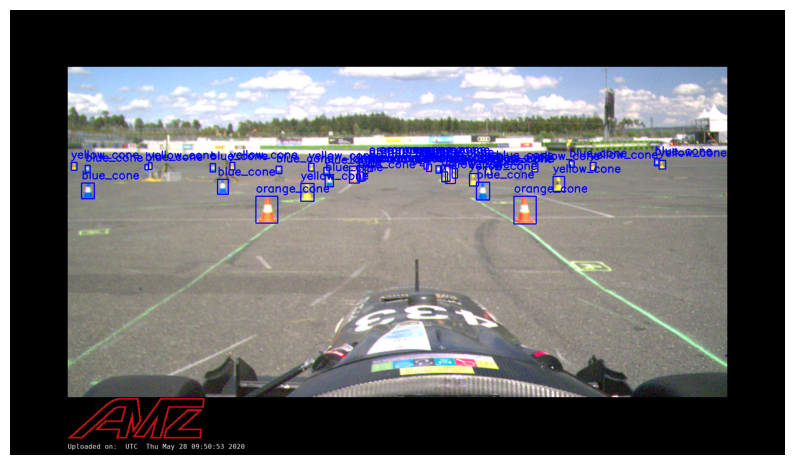

Processing image: train/images\amz_00216.png
Using annotations: train/labels\amz_00216.txt


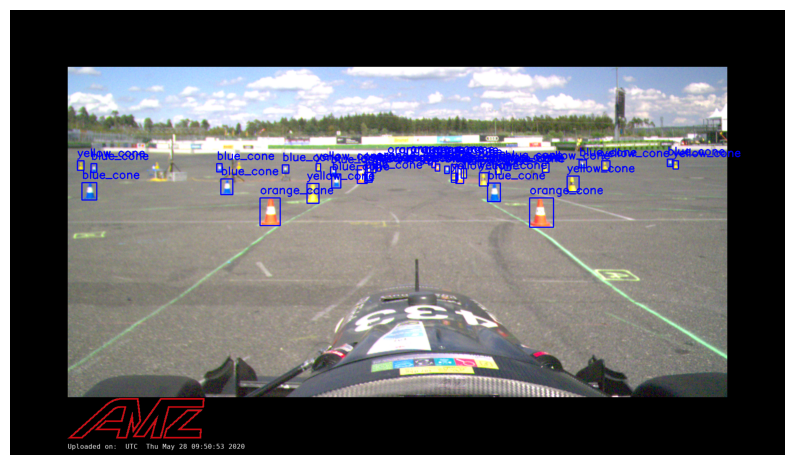

Processing image: train/images\amz_00218.png
Using annotations: train/labels\amz_00218.txt


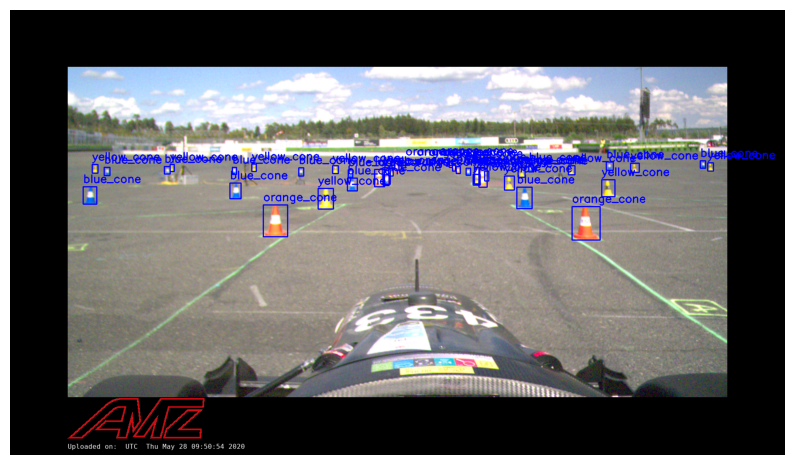

In [49]:
def display_image_with_annotations(image_path, annotation_path, class_names):  # Func to display images with bounding boxes and class names
    print(f"Processing image: {image_path}")
    print(f"Using annotations: {annotation_path}")

    image = cv2.imread(image_path)
    annotations = load_annotations(annotation_path)
    for ann in annotations:
        class_id, x_center, y_center, width, height = map(float, ann)
        img_h, img_w, _ = image.shape
        x_center, y_center, width, height = int(x_center * img_w), int(y_center * img_h), int(width * img_w), int(height * img_h)
        x1, y1 = int(x_center - width / 2), int(y_center - height / 2)
        x2, y2 = int(x_center + width / 2), int(y_center + height / 2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
        # Add class name
        class_name = class_names[int(class_id)]
        cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    

train_images = os.listdir(train_images_path)  #taking some example from training set
train_annotations = os.listdir(train_annotations_path)

for i in range(3):
    img_path = os.path.join(train_images_path, train_images[i])
    ann_path = os.path.join(train_annotations_path, train_annotations[i])
    display_image_with_annotations(img_path, ann_path, class_names)

In [50]:
def count_files(directory):   # Dataset Statistics
    return len(os.listdir(directory))

train_image_count = count_files(train_images_path)
train_annotation_count = count_files(train_annotations_path)
test_image_count = count_files(test_images_path)
test_annotation_count = count_files(test_annotations_path)

print(f"Number of training images: {train_image_count}")
print(f"Number of training annotations: {train_annotation_count}")
print(f"Number of testing images: {test_image_count}")
print(f"Number of testing annotations: {test_annotation_count}")

Number of training images: 5125
Number of training annotations: 5125
Number of testing images: 1214
Number of testing annotations: 1214


In [51]:
def analyze_bounding_boxes(directory_path):  # Bounding Box Statistics
    widths, heights = [], []
    for file_name in os.listdir(directory_path):
        annotations = load_annotations(os.path.join(directory_path, file_name))
        for ann in annotations:
            _, x_center, y_center, width, height = map(float, ann)
            widths.append(width)
            heights.append(height)
    return np.array(widths), np.array(heights)

train_widths, train_heights = analyze_bounding_boxes(train_annotations_path)
test_widths, test_heights = analyze_bounding_boxes(test_annotations_path)

print(f"Training set - Mean width: {train_widths.mean()}, Mean height: {train_heights.mean()}")
print(f"Testing set - Mean width: {test_widths.mean()}, Mean height: {test_heights.mean()}")

Training set - Mean width: 0.010480192678090137, Mean height: 0.03049997083225992
Testing set - Mean width: 0.010732336881070005, Mean height: 0.03116158415700159


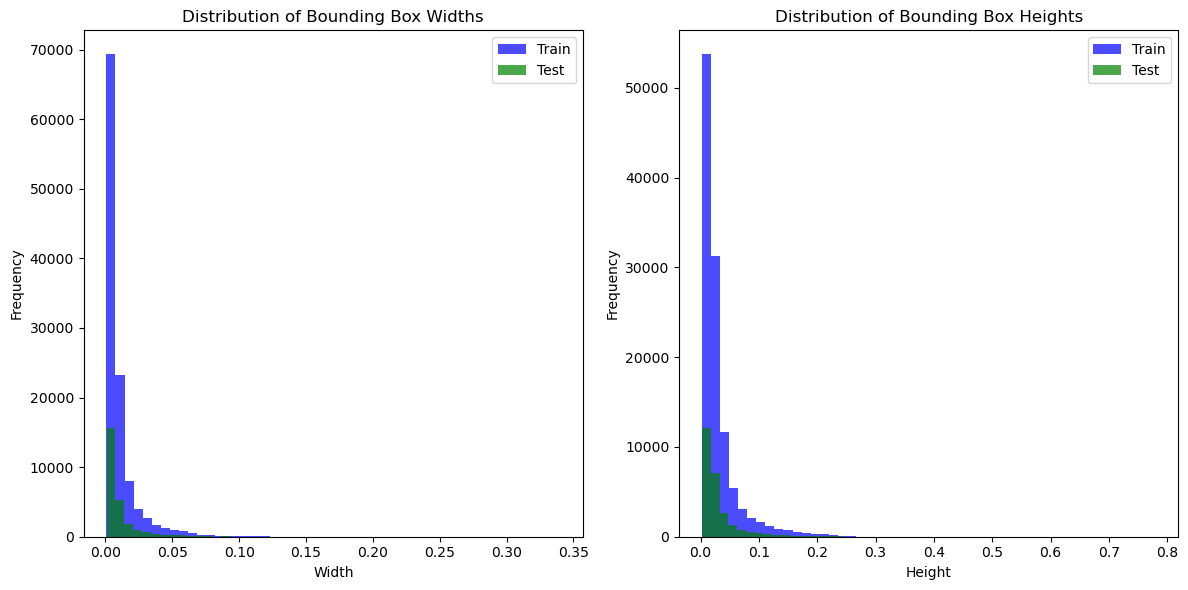

In [38]:
plt.figure(figsize=(12, 6)) # Visualize Bounding Box Distribution
plt.subplot(1, 2, 1)
plt.hist(train_widths, bins=50, color='blue', alpha=0.7, label='Train')
plt.hist(test_widths, bins=50, color='green', alpha=0.7, label='Test')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Bounding Box Widths')

plt.subplot(1, 2, 2)
plt.hist(train_heights, bins=50, color='blue', alpha=0.7, label='Train')
plt.hist(test_heights, bins=50, color='green', alpha=0.7, label='Test')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Bounding Box Heights')

plt.tight_layout()
plt.show()

##### My Observation from the plot above:
- *x-axis*: normalized height and width , ranging from 0 to approx. 0.35 for width and 0 to approx. 0.8 for height, *y-axis*: frequency(i.e. how often bounding boxes of a certain width or height appear)
- Train set(blue) and Test set(green) show simiar distribution with consistent annotation process[*which is positive for model generalization*], training shows high frequency of bounding box compared to test.
- Most bounding boxes are narrow, with widths averaging around 1% of the image width, while heights average about 3% of the image height. Both distributions are right-skewed, suggesting that the majority of bounding boxes have small relative dimensions close to zero, with fewer instances of larger dimensions.